# NumPy vs foor loops

## Running python file

In [1]:
%run -i Matrix-Multiplication-RunTime.py

In [2]:
help(main)

Help on function main in module __main__:

main(sizes)
    Function that performs run time computations
    return: loop_run, numpy_run, tensor_run



In [3]:
# Define sizes for iterations
sizes = [i for i in range(0, 51000, 5000)]

# Compute run times
loop_run, numpy_run, tensor_run = main(sizes=sizes)

In [4]:
# Print results
print_results(loop_run, numpy_run, tensor_run)

Loop run time:    [0.0, 1.467, 2.791, 4.128, 5.634, 6.965, 8.434, 9.87, 11.343, 12.866, 15.525]
NumPy run time:   [0.0, 0.064, 0.099, 0.156, 0.19, 0.217, 0.266, 0.307, 0.36, 0.417, 0.515]
Tensor run time:  [0.0, 0.04, 0.077, 0.128, 0.162, 0.201, 0.227, 0.27, 0.319, 0.384, 0.399]


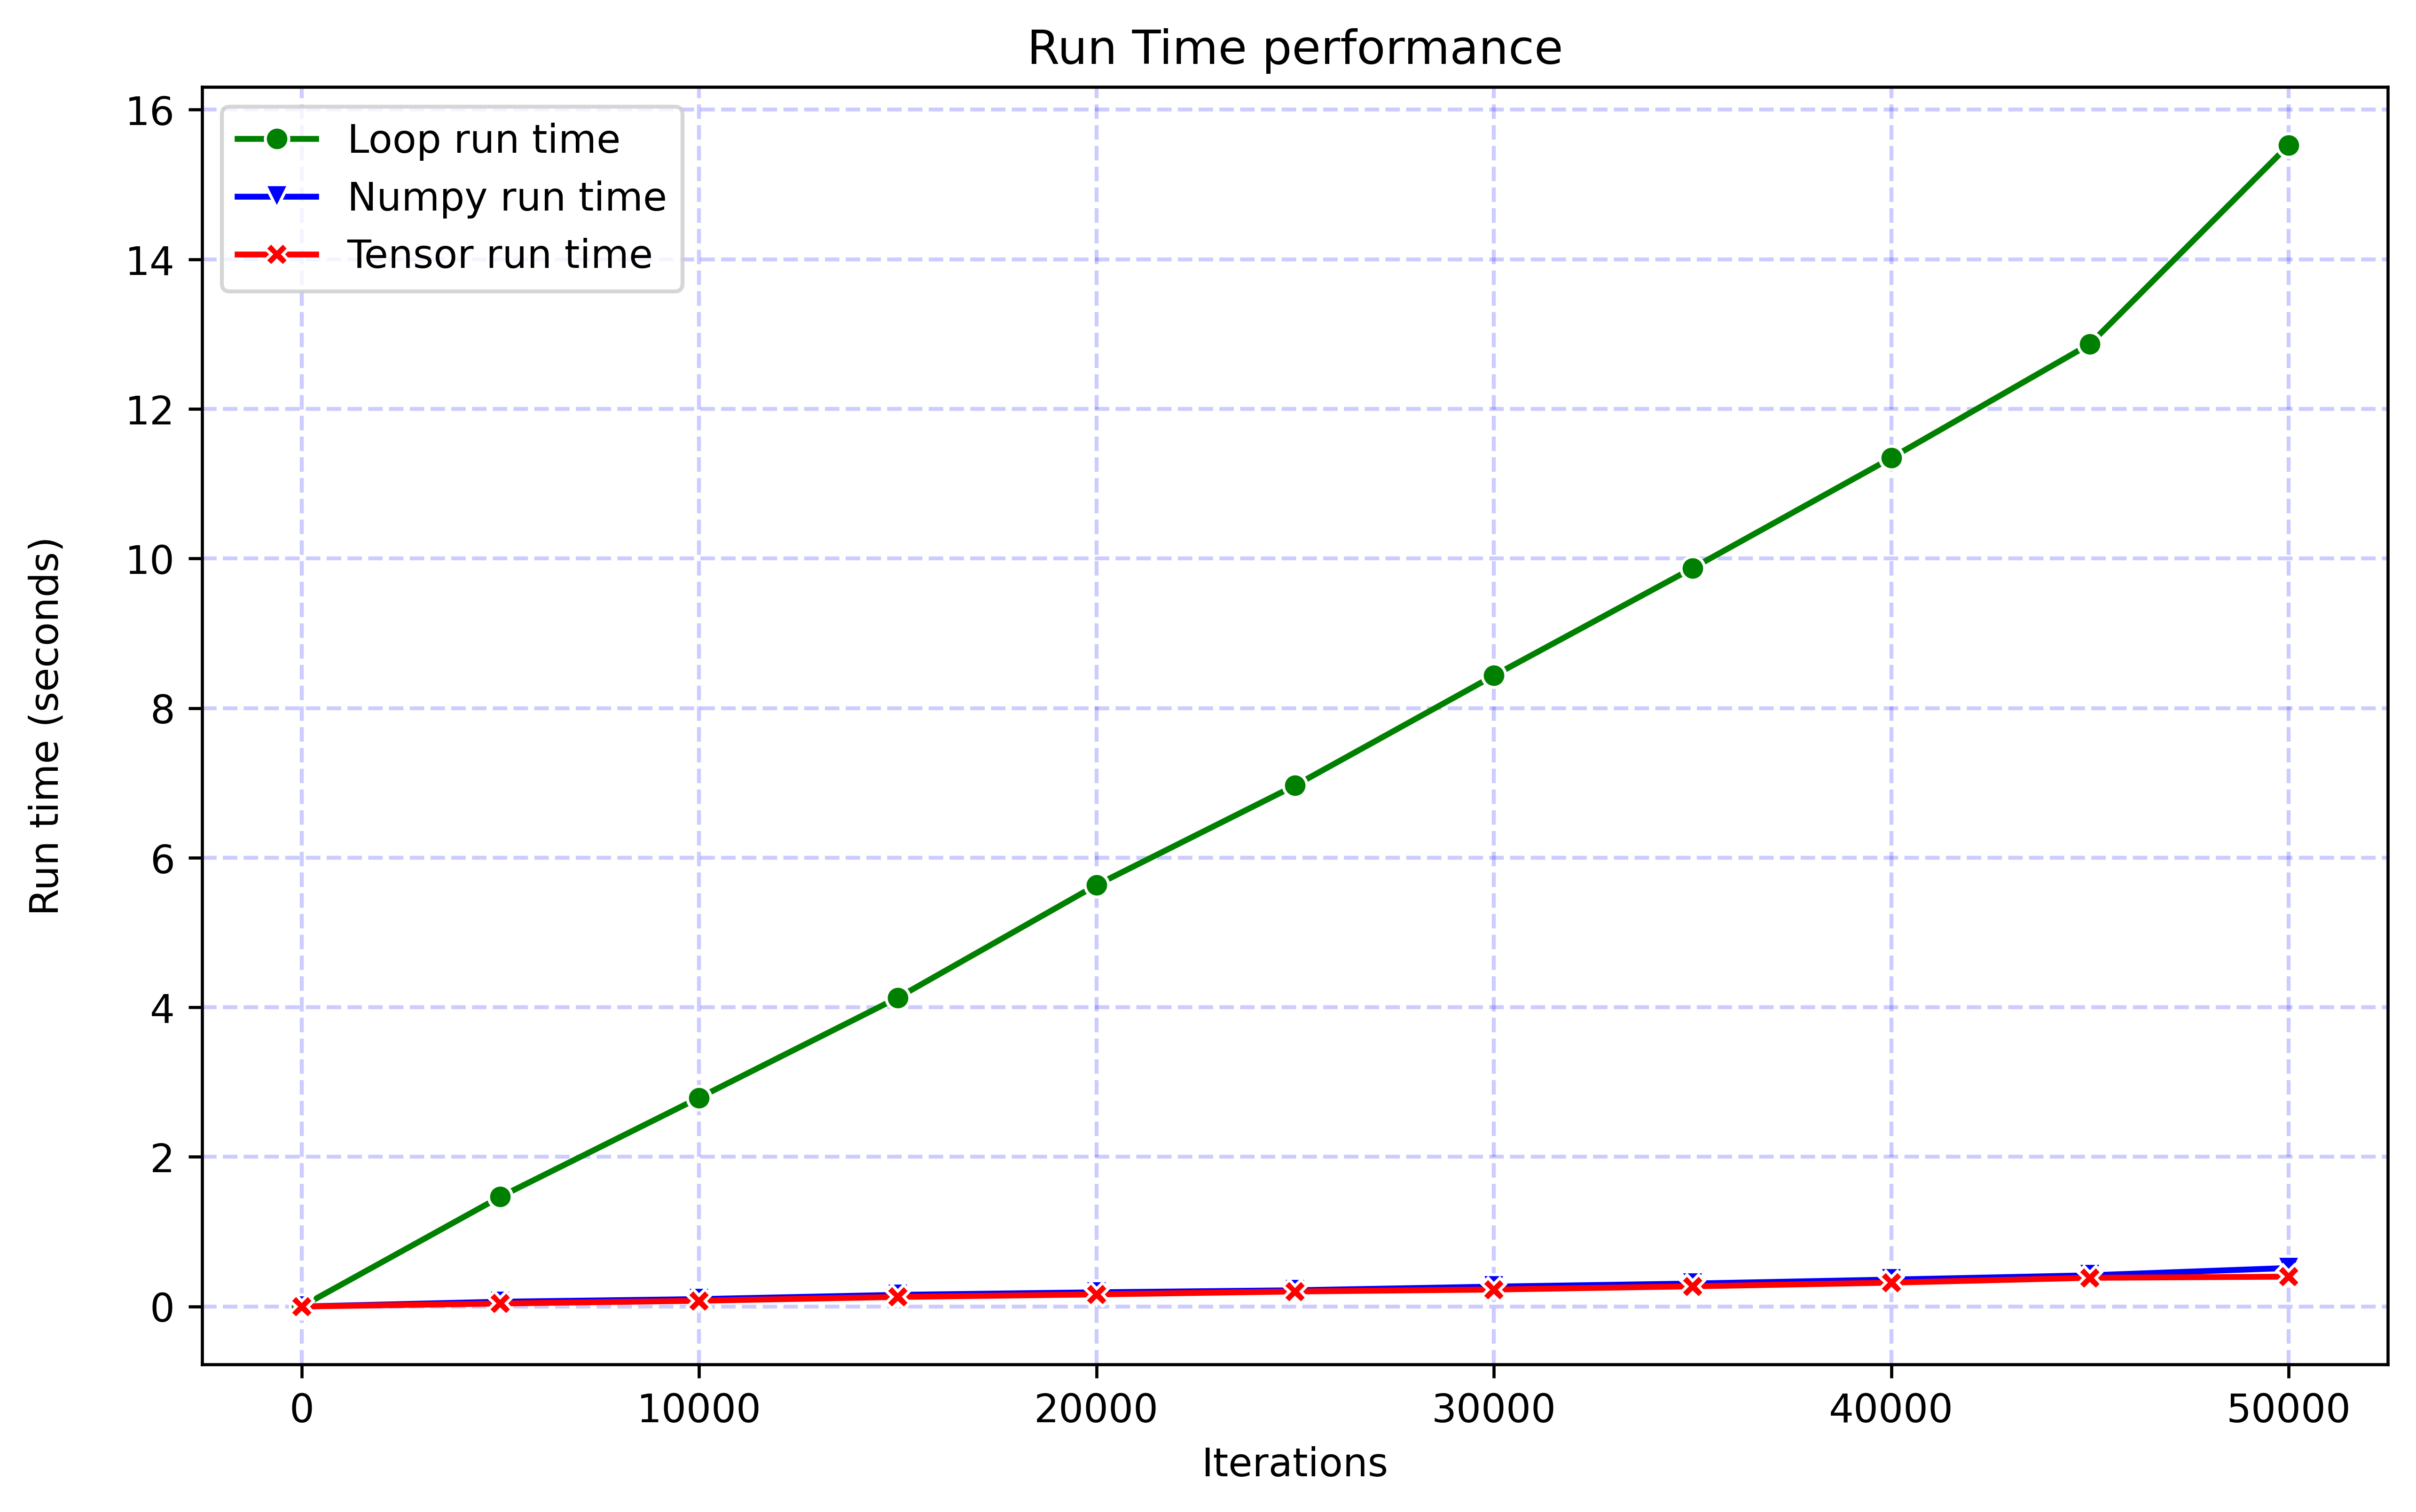

In [5]:
# Plot graph
plot_graph(sizes, loop_run, numpy_run, tensor_run)